<a href="https://colab.research.google.com/github/dev-SARDAR/FMML_Assignment-2022/blob/main/Module9_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

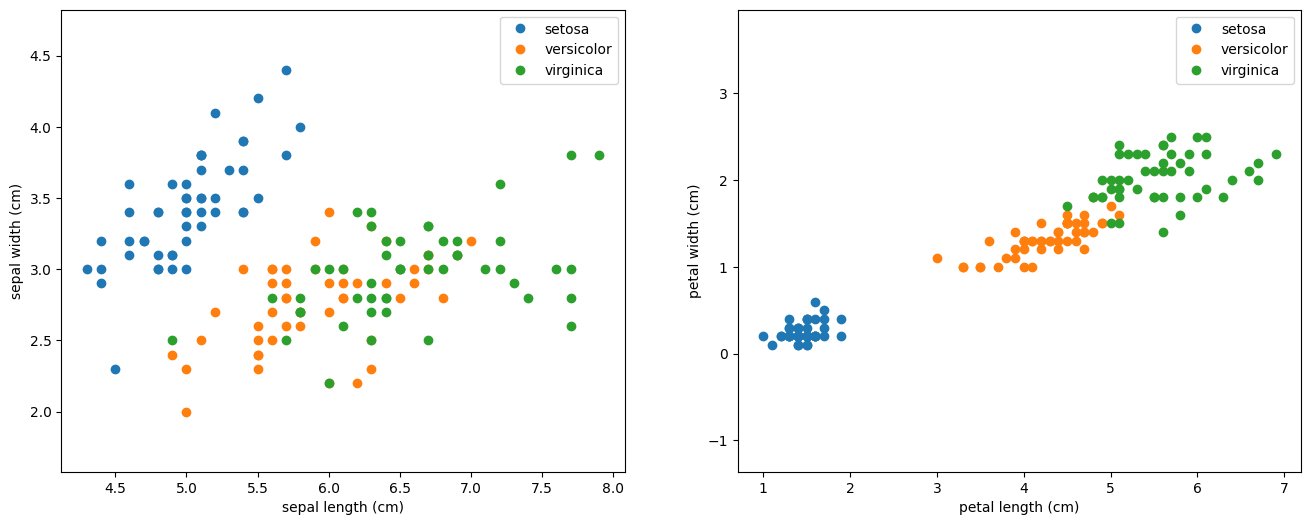

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [14]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [15]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [16]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [17]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 632.37it/s]


# Plot training progress

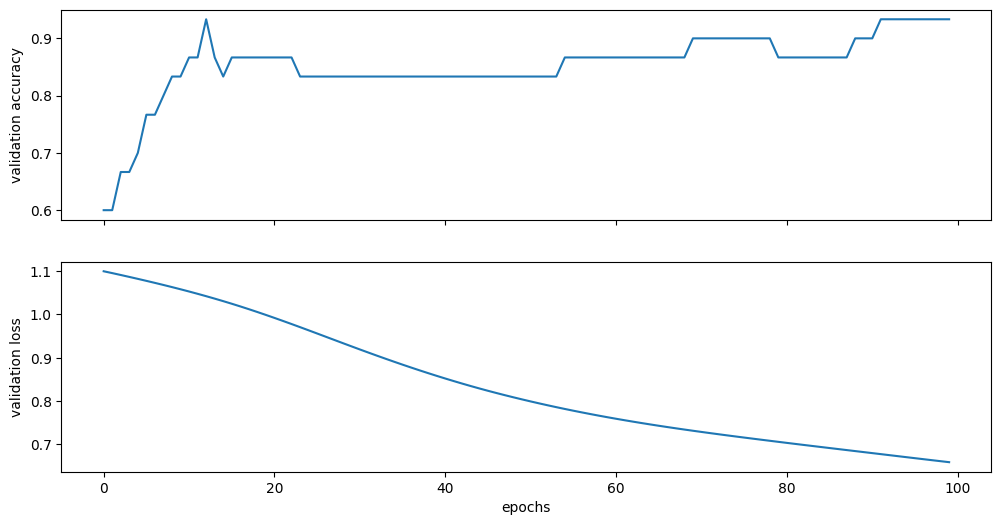

In [18]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

##Q) Try changing the number of hidden layers.
##Answer)

100%|██████████| 100/100 [00:00<00:00, 412.00it/s]


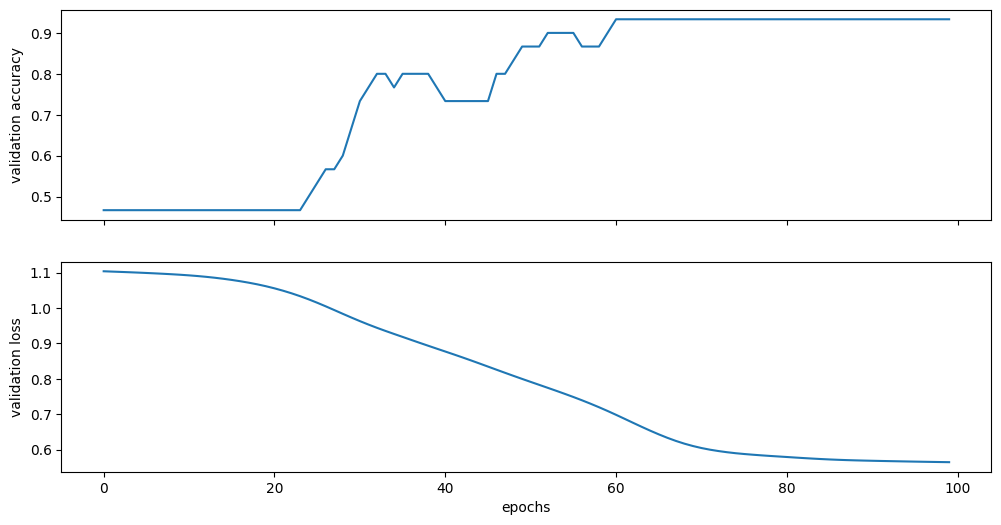

In [21]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 50)
        self.layer4 = nn.Linear(50, 50)
        self.layer5 = nn.Linear(50, 50)
        self.layer6 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = F.softmax(self.layer6(x), dim=1)
        return x

# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train for 100 epochs
EPOCHS  = 100
#X_train = torch.from_numpy(X_train).float()
#X_test= torch.from_numpy(X_test).float()
#y_test = torch.from_numpy(y_test)
#y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

* Changing the number of hidden layers in a neural network can have a significant impact on its performance and learning capability.
* Adding more hidden layers allows the network to learn more complex representations and potentially improve its ability to capture intricate patterns in the data.
* However, increasing the number of hidden layers also increases the model's complexity and the risk of overfitting.

* When adding more hidden layers, it's important to find the right balance.
* Too few hidden layers may result in underfitting, where the model struggles to capture the underlying patterns in the data.
* On the other hand, too many hidden layers can lead to overfitting, where the model becomes overly specialized to the training data and performs poorly on unseen data.

---



##Q) Try changing the number of neurons in the hidden layer.
##Answer)

100%|██████████| 100/100 [00:00<00:00, 304.86it/s]


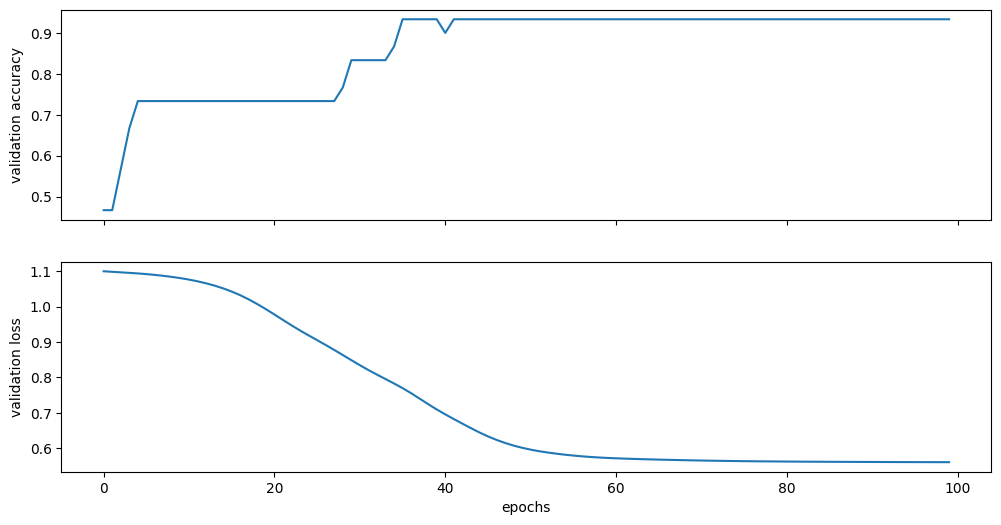

In [22]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 100)
        self.layer3 = nn.Linear(100, 100)
        self.layer4 = nn.Linear(100, 100)
        self.layer5 = nn.Linear(100, 50)
        self.layer6 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = F.softmax(self.layer6(x), dim=1)
        return x

# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train for 100 epochs
EPOCHS  = 100
#X_train = torch.from_numpy(X_train).float()
#X_test= torch.from_numpy(X_test).float()
#y_test = torch.from_numpy(y_test)
#y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

* Changing the number of neurons in the hidden layer of a neural network can also have a significant impact on its performance and learning capability.
* The number of neurons determines the capacity of the hidden layer to capture and represent complex patterns in the data.

* Increasing the number of neurons in a hidden layer can enhance the model's ability to learn intricate details and potentially improve its performance.
* However, adding too many neurons can lead to overfitting, where the model becomes too specialized to the training data and fails to generalize well to unseen data.

* On the other hand, decreasing the number of neurons in a hidden layer can result in underfitting, where the model may struggle to capture the underlying patterns and fail to achieve satisfactory performance.

---



##Q) Try using a different activation function.
##Answer)

100%|██████████| 100/100 [00:00<00:00, 271.73it/s]


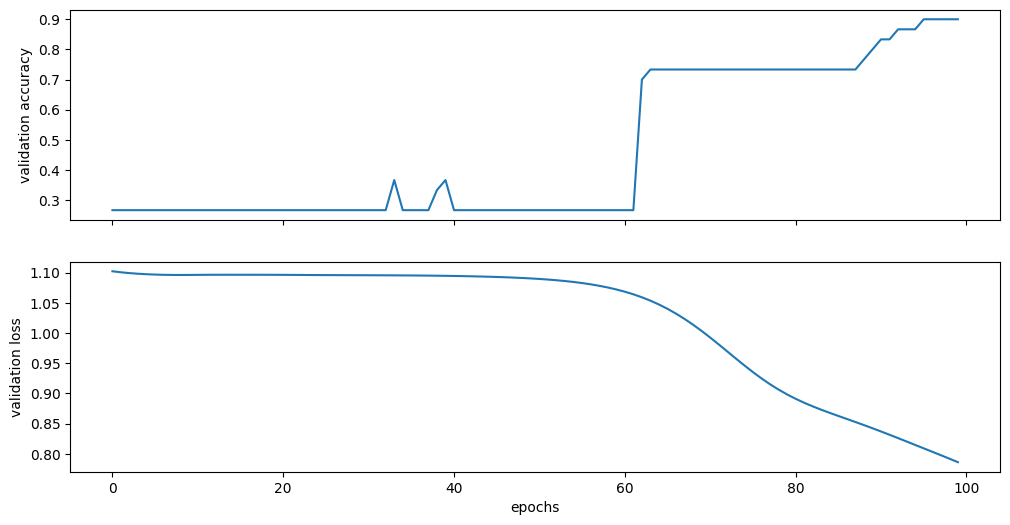

In [23]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 100)
        self.layer3 = nn.Linear(100, 100)
        self.layer4 = nn.Linear(100, 100)
        self.layer5 = nn.Linear(100, 50)
        self.layer6 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.sigmoid(self.layer1(x))
        x = F.sigmoid(self.layer2(x))
        x = F.sigmoid(self.layer3(x))
        x = F.sigmoid(self.layer4(x))
        x = F.sigmoid(self.layer5(x))
        x = F.softmax(self.layer6(x), dim=1)
        return x

# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train for 100 epochs
EPOCHS  = 100
#X_train = torch.from_numpy(X_train).float()
#X_test= torch.from_numpy(X_test).float()
#y_test = torch.from_numpy(y_test)
#y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

* Using a different activation function can also have a significant impact on the performance and learning capability of a neural network.
* Different activation functions introduce non-linearities into the network, enabling it to learn and represent complex relationships in the data.

* The ReLU (Rectified Linear Unit) activation function is used in the hidden layers, and the softmax activation function is used in the output layer.
* ReLU is a commonly used activation function that introduces non-linearity by mapping negative values to zero and keeping positive values unchanged.
* Softmax is used in multi-class classification problems to obtain a probability distribution over the classes.

* The Sigmoid activation function is used in all the hidden layers instead of ReLU. Sigmoid maps the input values to the range (0, 1), which can be interpreted as probabilities.

---

